In [1]:
!pip install opencv-python

In [2]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Task 1 - Image Statics and Colour Space Conversion

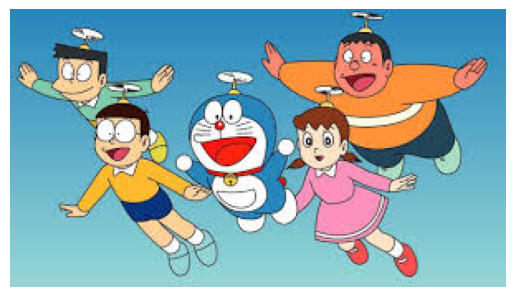

In [3]:
# Read the image using OpenCV
image = cv2.imread("doremon.jpeg")

# Convert from BGR to RGB (OpenCV uses BGR by default, matplotlib uses RGB)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display using matplotlib
plt.imshow(image_rgb)
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()

In [4]:
# Split the image into its B, G, R components
b_channel, g_channel, r_channel = cv2.split(image)

# Compute mean and standard deviation for each channel
b_mean, b_std = np.mean(b_channel), np.std(b_channel)
g_mean, g_std = np.mean(g_channel), np.std(g_channel)
r_mean, r_std = np.mean(r_channel), np.std(r_channel)

print(f"B Channel - Mean: {b_mean}, Std Dev: {b_std}")
print(f"G Channel - Mean: {g_mean}, Std Dev: {g_std}")
print(f"R Channel - Mean: {r_mean}, Std Dev: {r_std}")

B Channel - Mean: 172.28228174603174, Std Dev: 57.525228933410204
G Channel - Mean: 163.74373015873016, Std Dev: 48.55707409653175
R Channel - Mean: 129.22222222222223, Std Dev: 73.05971778836609


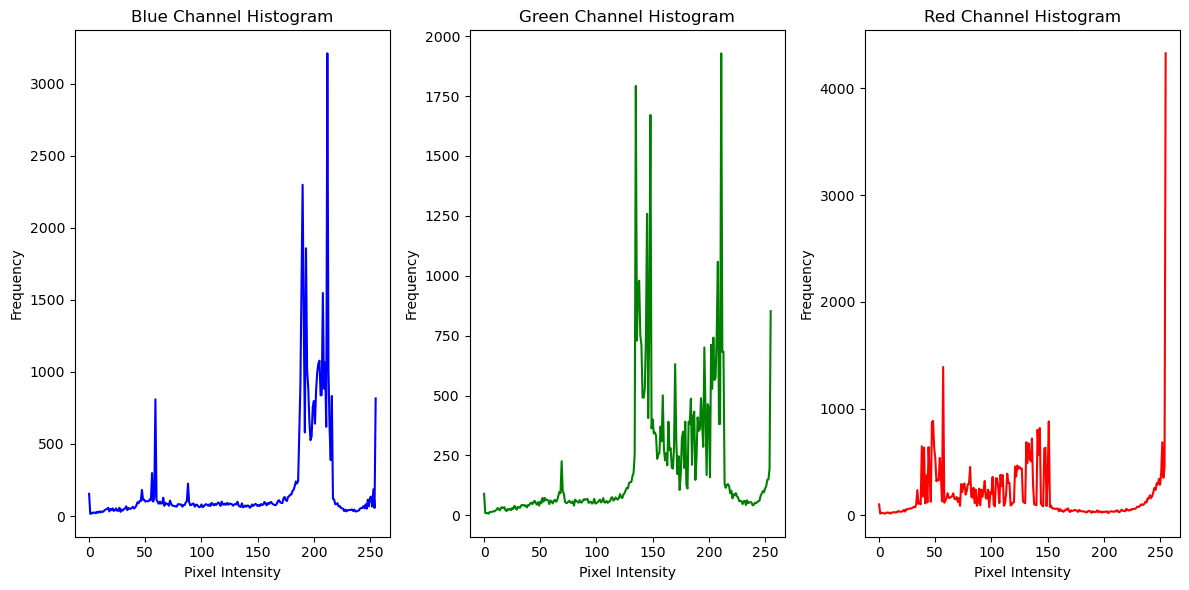

In [5]:
# Compute histograms for each channel
b_hist = cv2.calcHist([b_channel], [0], None, [256], [0, 256])
g_hist = cv2.calcHist([g_channel], [0], None, [256], [0, 256])
r_hist = cv2.calcHist([r_channel], [0], None, [256], [0, 256])

# Plot the histograms
plt.figure(figsize=(12, 6))

# Plot Blue channel histogram
plt.subplot(1, 3, 1)
plt.plot(b_hist, color='blue')
plt.title('Blue Channel Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

# Plot Green channel histogram
plt.subplot(1, 3, 2)
plt.plot(g_hist, color='green')
plt.title('Green Channel Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

# Plot Red channel histogram
plt.subplot(1, 3, 3)
plt.plot(r_hist, color='red')
plt.title('Red Channel Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

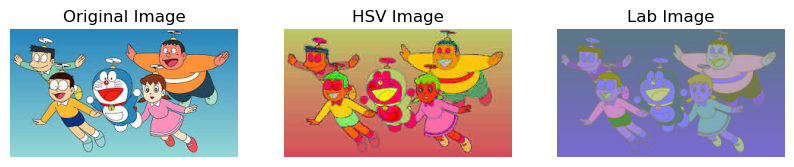

In [6]:
# Convert to HSV color space
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Convert to Lab color space
lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2Lab)

# Function to display images
def show_images(images, titles):
    plt.figure(figsize=(10, 10))
    for i, (img, title) in enumerate(zip(images, titles)):
        plt.subplot(1, len(images), i + 1)
        if len(img.shape) == 3 and img.shape[2] == 3:  # Color image
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            plt.imshow(img_rgb)
        else:
            plt.imshow(img, cmap='gray')
        plt.title(title)
        plt.axis('off')
    plt.show()

# Display the original, HSV, and Lab images
show_images([image, hsv_image, lab_image], ['Original Image', 'HSV Image', 'Lab Image'])

# Task 2 - Image Segmentation using Thresholding

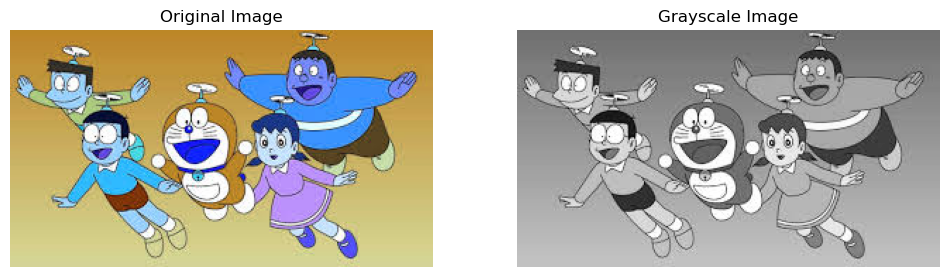

In [7]:
# Convert the color image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Function to display images
def show_images(images, titles):
    plt.figure(figsize=(12, 6))
    for i, (img, title) in enumerate(zip(images, titles)):
        plt.subplot(1, len(images), i + 1)
        plt.imshow(img, cmap='gray' if len(img.shape) == 2 else None)
        plt.title(title)
        plt.axis('off')
    plt.show()

# Display the original color image and the grayscale image
show_images([image, gray_image], ['Original Image', 'Grayscale Image'])

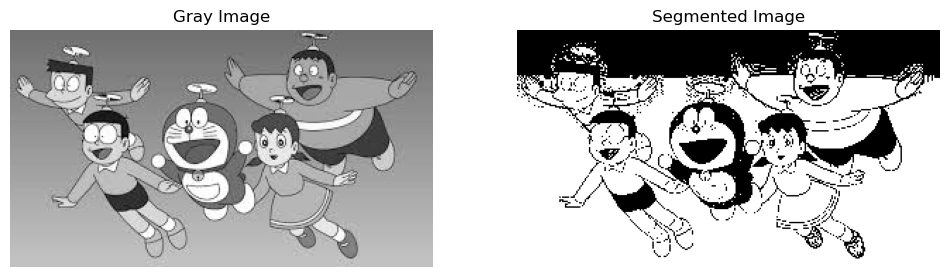

In [8]:
# Define the threshold value
threshold_value = 127

# Apply global thresholding
_, segmented_image = cv2.threshold(gray_image, threshold_value, 255, cv2.THRESH_BINARY)

# Function to display images
def show_images(images, titles):
    plt.figure(figsize=(12, 6))
    for i, (img, title) in enumerate(zip(images, titles)):
        plt.subplot(1, len(images), i + 1)
        plt.imshow(img, cmap='gray')
        plt.title(title)
        plt.axis('off')
    plt.show()

# Display the original and segmented images
show_images([gray_image, segmented_image], ['Gray Image', 'Segmented Image'])

# Colour Based Segmentation

In [9]:
#Define the HSV range for the color you want to segment
# These ranges are for detecting a shade of red; adjust them as needed
lower_color = np.array([0, 100, 100])   # Lower bound of HSV range
upper_color = np.array([10, 255, 255])  # Upper bound of HSV range

# Create a binary mask using the color range
mask = cv2.inRange(hsv_image, lower_color, upper_color)

# Optional: refine the mask using morphological operations
kernel = np.ones((5, 5), np.uint8)
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)  # Remove small holes
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)   # Remove small noise

# Apply the mask to the original image
segmented_image = cv2.bitwise_and(image, image, mask=mask)

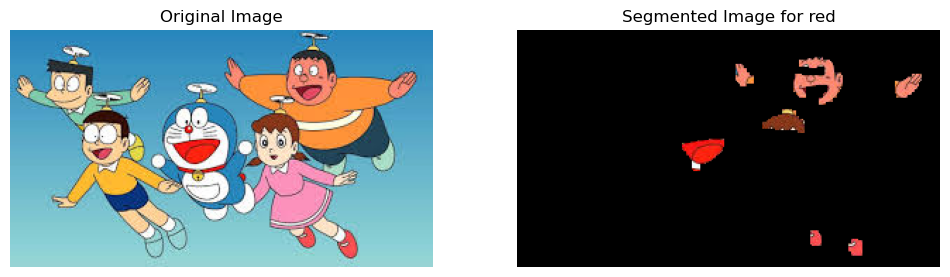

In [11]:
# Function to display images
def show_images(images, titles):
    plt.figure(figsize=(12, 6))
    for i, (img, title) in enumerate(zip(images, titles)):
        plt.subplot(1, len(images), i + 1)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) if len(img.shape) == 3 else img
        plt.imshow(img_rgb)
        plt.title(title)
        plt.axis('off')
    plt.show()

# Display the original image and the segmented image
show_images([image, segmented_image], ['Original Image', 'Segmented Image for red'])

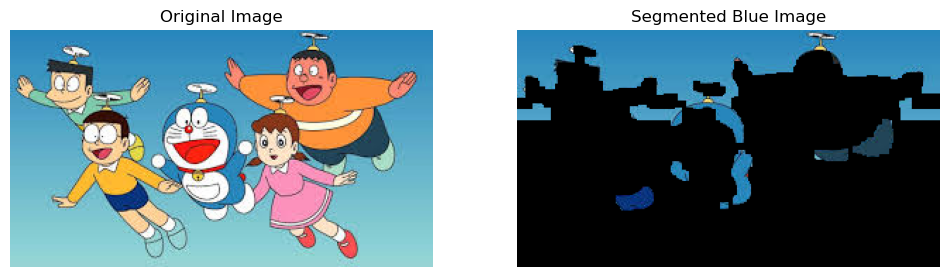

In [14]:
# Define the HSV range for the color blue
blue_lower_color = np.array([100, 150, 0])    # Lower bound of HSV range for blue
blue_upper_color = np.array([140, 255, 255])  # Upper bound of HSV range for blue

# Create a binary mask using the color range
mask = cv2.inRange(hsv_image, blue_lower_color, blue_upper_color)

# Optional: refine the mask using morphological operations
kernel = np.ones((5, 5), np.uint8)
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)  # Remove small holes
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)   # Remove small noise

# Apply the mask to the original image
segmented_blue_image = cv2.bitwise_and(image, image, mask=mask)

# Function to display images
def show_images(images, titles):
    plt.figure(figsize=(12, 6))
    for i, (img, title) in enumerate(zip(images, titles)):
        plt.subplot(1, len(images), i + 1)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) if len(img.shape) == 3 else img
        plt.imshow(img_rgb)
        plt.title(title)
        plt.axis('off')
    plt.show()

# Display the original image and the segmented image
show_images([image, segmented_blue_image], ['Original Image', 'Segmented Blue Image'])

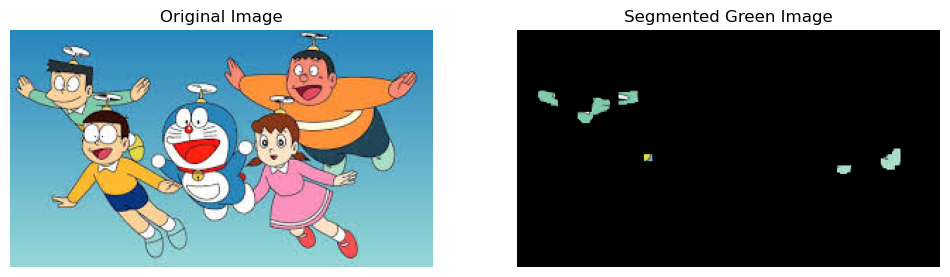

In [15]:
# Define the HSV range for the color green
green_lower_color = np.array([35, 50, 50])    # Lower bound of HSV range for green
green_upper_color = np.array([85, 255, 255])  # Upper bound of HSV range for green

# Create a binary mask using the color range
mask = cv2.inRange(hsv_image, green_lower_color, green_upper_color)

# Optional: refine the mask using morphological operations
kernel = np.ones((5, 5), np.uint8)
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)  # Remove small holes
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)   # Remove small noise

# Apply the mask to the original image
segmented_green_image = cv2.bitwise_and(image, image, mask=mask)

# Function to display images
def show_images(images, titles):
    plt.figure(figsize=(12, 6))
    for i, (img, title) in enumerate(zip(images, titles)):
        plt.subplot(1, len(images), i + 1)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) if len(img.shape) == 3 else img
        plt.imshow(img_rgb)
        plt.title(title)
        plt.axis('off')
    plt.show()

# Display the original image and the segmented image
show_images([image, segmented_green_image], ['Original Image', 'Segmented Green Image'])

THANK YOU !!!